In [1]:
%pip install "pycaret[full]"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv("air4thai_44t_2024-01-01_2024-02-26.csv")
df

,Unnamed: 0,DATETIMEDATA,PM25,PM10,O3,CO,NO2,SO2,WS,TEMP,RH,WD
0,0,2024-01-01 00:00:00,16.5,NaN,16.0,NaN,NaN,NaN,1,27,79,115
1,1,2024-01-01 01:00:00,33.6,NaN,0.0,NaN,NaN,NaN,1,27,82,97
2,2,2024-01-01 02:00:00,34.2,NaN,0.0,NaN,NaN,NaN,1,26,84,96
3,3,2024-01-01 03:00:00,20.1,NaN,0.0,NaN,NaN,NaN,1,26,82,108
4,4,2024-01-01 04:00:00,16.5,NaN,1.0,NaN,NaN,NaN,1,27,79,106
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,1363,2024-02-26 19:00:00,19.8,NaN,NaN,NaN,NaN,NaN,1,29,69,170
1364,1364,2024-02-26 20:00:00,20.2,NaN,NaN,NaN,NaN,NaN,1,29,72,191
1365,1365,2024-02-26 21:00:00,16.0,NaN,NaN,NaN,NaN,NaN,1,28,72,139
1366,1366,2024-02-26 22:00:00,18.7,NaN,NaN,NaN,NaN,NaN,1,28,72,119


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1368 non-null   int64  
 1   DATETIMEDATA  1368 non-null   object 
 2   PM25          1353 non-null   float64
 3   PM10          0 non-null      float64
 4   O3            1137 non-null   float64
 5   CO            0 non-null      float64
 6   NO2           0 non-null      float64
 7   SO2           0 non-null      float64
 8   WS            1368 non-null   int64  
 9   TEMP          1368 non-null   int64  
 10  RH            1368 non-null   int64  
 11  WD            1368 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 128.4+ KB


In [4]:

mean_pm = df['PM25'].mean()
df['PM25'].fillna(mean_pm, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1368 non-null   int64  
 1   DATETIMEDATA  1368 non-null   object 
 2   PM25          1368 non-null   float64
 3   PM10          0 non-null      float64
 4   O3            1137 non-null   float64
 5   CO            0 non-null      float64
 6   NO2           0 non-null      float64
 7   SO2           0 non-null      float64
 8   WS            1368 non-null   int64  
 9   TEMP          1368 non-null   int64  
 10  RH            1368 non-null   int64  
 11  WD            1368 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 128.4+ KB


In [5]:
from pycaret.regression import *
s = setup(df, target='PM25')


,Description,Value
0,Session id,1587
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(1368, 12)"
4,Transformed data shape,"(1368, 8)"
5,Transformed train set shape,"(957, 8)"
6,Transformed test set shape,"(411, 8)"
7,Numeric features,10
8,Categorical features,1
9,Rows with missing values,100.0%


In [6]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,3.2470,18.2571,4.2551,0.3248,0.2238,0.1945,0.0100
en,Elastic Net,3.9327,26.4128,5.1120,0.0429,0.2751,0.2472,0.0080
huber,Huber Regressor,3.9462,26.5429,5.1265,0.0342,0.2747,0.2454,0.0100
lasso,Lasso Regression,3.9704,27.1248,5.1805,0.0174,0.2780,0.2495,0.1560
llar,Lasso Least Angle Regression,3.9704,27.1248,5.1805,0.0174,0.2780,0.2495,0.0070
omp,Orthogonal Matching Pursuit,4.0022,27.6331,5.2266,0.0005,0.2802,0.2514,0.0080
lightgbm,Light Gradient Boosting Machine,4.0003,27.6608,5.2314,-0.0019,0.2802,0.2509,0.1750
catboost,CatBoost Regressor,4.0043,27.7251,5.2375,-0.0043,0.2807,0.2515,0.2890
ridge,Ridge Regression,4.0035,27.7272,5.2379,-0.0044,0.2806,0.2513,0.0080
xgboost,Extreme Gradient Boosting,4.0019,27.7329,5.2383,-0.0046,0.2805,0.2508,1.4300


In [29]:
model_knn	 = create_model("knn")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2237,15.7364,3.9669,0.4547,0.2044,0.1872
1,3.0377,13.6832,3.6991,0.5163,0.2094,0.1933
2,3.0295,16.6025,4.0746,0.1717,0.2287,0.1986
3,3.5814,21.0864,4.5920,0.3321,0.2366,0.2119
4,3.0799,15.5021,3.9373,0.2510,0.2153,0.1871
5,3.0477,16.1385,4.0173,0.4247,0.2098,0.1830
6,3.7237,24.8778,4.9878,0.2826,0.2457,0.2148
7,3.2311,18.8295,4.3393,0.1205,0.2344,0.1895
8,3.3627,22.7320,4.7678,0.4012,0.2293,0.1877


In [30]:
bagged_dt = ensemble_model(model_knn, n_estimators=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0910,14.8024,3.8474,0.4871,0.1983,0.1803
1,3.0428,13.5467,3.6806,0.5211,0.2089,0.1950
2,2.9841,16.0355,4.0044,0.2000,0.2251,0.1957
3,3.4870,20.4515,4.5223,0.3522,0.2336,0.2078
4,2.9930,14.8817,3.8577,0.2810,0.2117,0.1825
5,3.0977,16.3535,4.0439,0.4170,0.2104,0.1849
6,3.6997,23.1966,4.8163,0.3311,0.2390,0.2137
7,3.1841,18.2372,4.2705,0.1482,0.2295,0.1881
8,3.2338,21.9020,4.6800,0.4231,0.2234,0.1808


In [27]:
print(best)

KNeighborsRegressor(n_jobs=-1)


In [13]:
finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Unnamed: 0', 'PM10', 'O3', 'CO',
                                             'NO2', 'SO2', 'WS', 'TEMP', 'RH',
                                             'WD'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['DATETIMEDATA'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['DATETIMEDATA'],
                                    transformer=TargetEncoder(cols=['DATETIMEDATA'],
                                                              handle_missing='return_nan'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator', KNeighborsRegressor(n_jobs=-1))])

In [7]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

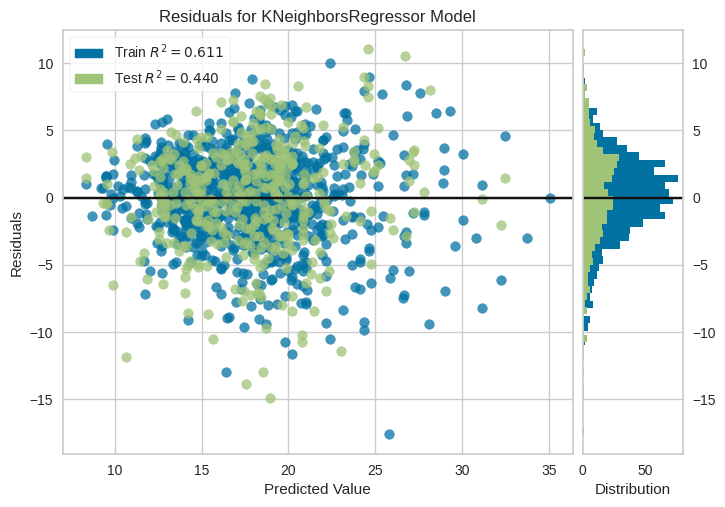

In [8]:
plot_model(best, plot = 'residuals')

In [9]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,3.0563,15.6379,3.9545,0.4405,0.2125,0.1861


,Unnamed: 0,DATETIMEDATA,PM10,O3,CO,NO2,SO2,WS,TEMP,RH,WD,PM25,prediction_label
1146,1146,2024-02-17 18:00:00,NaN,21.0,NaN,NaN,NaN,1,29,64,180,15.3,18.179998
1240,1240,2024-02-21 16:00:00,NaN,28.0,NaN,NaN,NaN,1,33,52,174,17.9,11.880000
1214,1214,2024-02-20 14:00:00,NaN,19.0,NaN,NaN,NaN,1,34,46,151,9.8,13.920000
230,230,2024-01-10 14:00:00,NaN,10.0,NaN,NaN,NaN,1,32,55,163,13.2,12.639999
445,445,2024-01-19 13:00:00,NaN,32.0,NaN,NaN,NaN,1,32,55,176,13.6,15.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1073,2024-02-14 17:00:00,NaN,10.0,NaN,NaN,NaN,1,30,66,194,17.6,20.200001
714,714,2024-01-30 18:00:00,NaN,6.0,NaN,NaN,NaN,1,28,67,131,16.4,19.719997
595,595,2024-01-25 19:00:00,NaN,19.0,NaN,NaN,NaN,0,27,79,168,8.9,13.539999
879,879,2024-02-06 15:00:00,NaN,12.0,NaN,NaN,NaN,1,33,50,148,11.1,16.822159


In [14]:
predict_model(best, df)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,2.6754,12.2467,3.4995,0.5593,0.1859,0.1606


,Unnamed: 0,DATETIMEDATA,PM10,O3,CO,NO2,SO2,WS,TEMP,RH,WD,PM25,prediction_label
0,0,2024-01-01 00:00:00,NaN,16.0,NaN,NaN,NaN,1,27,79,115,16.500000,17.619999
1,1,2024-01-01 01:00:00,NaN,0.0,NaN,NaN,NaN,1,27,82,97,33.599998,24.380001
2,2,2024-01-01 02:00:00,NaN,0.0,NaN,NaN,NaN,1,26,84,96,34.200001,24.380001
3,3,2024-01-01 03:00:00,NaN,0.0,NaN,NaN,NaN,1,26,82,108,20.100000,24.379999
4,4,2024-01-01 04:00:00,NaN,1.0,NaN,NaN,NaN,1,27,79,106,16.500000,24.379999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,1363,2024-02-26 19:00:00,NaN,NaN,NaN,NaN,NaN,1,29,69,170,19.799999,20.700001
1364,1364,2024-02-26 20:00:00,NaN,NaN,NaN,NaN,NaN,1,29,72,191,20.200001,21.120001
1365,1365,2024-02-26 21:00:00,NaN,NaN,NaN,NaN,NaN,1,28,72,139,16.000000,20.360001
1366,1366,2024-02-26 22:00:00,NaN,NaN,NaN,NaN,NaN,1,28,72,119,18.700001,21.980000


In [26]:
df_pkl = pd.read_pickle("my_best_pipeline.pkl")
# print(df_pkl)
df_pkl

array(['Unnamed: 0', 'PM10', 'O3', 'CO', 'NO2', 'SO2', 'WS', 'TEMP', 'RH',
       'WD'], dtype=object)

In [10]:
predictions = predict_model(best, data=df)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,2.6754,12.2467,3.4995,0.5593,0.1859,0.1606


,Unnamed: 0,DATETIMEDATA,PM10,O3,CO,NO2,SO2,WS,TEMP,RH,WD,PM25,prediction_label
0,0,2024-01-01 00:00:00,NaN,16.0,NaN,NaN,NaN,1,27,79,115,16.500000,17.619999
1,1,2024-01-01 01:00:00,NaN,0.0,NaN,NaN,NaN,1,27,82,97,33.599998,24.380001
2,2,2024-01-01 02:00:00,NaN,0.0,NaN,NaN,NaN,1,26,84,96,34.200001,24.380001
3,3,2024-01-01 03:00:00,NaN,0.0,NaN,NaN,NaN,1,26,82,108,20.100000,24.379999
4,4,2024-01-01 04:00:00,NaN,1.0,NaN,NaN,NaN,1,27,79,106,16.500000,24.379999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,1363,2024-02-26 19:00:00,NaN,NaN,NaN,NaN,NaN,1,29,69,170,19.799999,20.700001
1364,1364,2024-02-26 20:00:00,NaN,NaN,NaN,NaN,NaN,1,29,72,191,20.200001,21.120001
1365,1365,2024-02-26 21:00:00,NaN,NaN,NaN,NaN,NaN,1,28,72,139,16.000000,20.360001
1366,1366,2024-02-26 22:00:00,NaN,NaN,NaN,NaN,NaN,1,28,72,119,18.700001,21.980000


In [24]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'PM10', 'O3', 'CO',
                                              'NO2', 'SO2', 'WS', 'TEMP', 'RH',
                                              'WD'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['DATETIMEDATA'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['DATETIMEDATA'],
                                     transformer=TargetEncoder(cols=['DATETIMEDATA'],
                                                               handle_missing='return_nan'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', KNeighborsRegressor

In [16]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Unnamed: 0', 'PM10', 'O3', 'CO',
                                             'NO2', 'SO2', 'WS', 'TEMP', 'RH',
                                             'WD'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['DATETIMEDATA'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['DATETIMEDATA'],
                                    transformer=TargetEncoder(cols=['DATETIMEDATA'],
                                                              handle_missing='return_nan'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
    